(480, 640, 3)


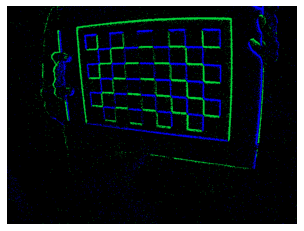

(480, 640, 3)


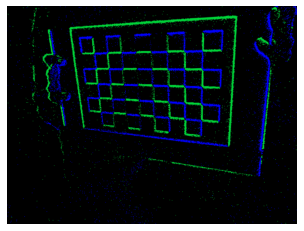

In [1]:

%matplotlib inline

import xml.etree.ElementTree as ET
import re
import numpy as np
import cv2 as cv
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


camera_id = 3

tree = ET.parse("calibration/cam" + str(camera_id) + ".xml")
root = tree.getroot()



x_max = int(root[0][2].text)
y_max = int(root[0][3].text)

# Regular expression to get values out of *.xml
rescinot = re.compile('[-+]?[\d]+\.?[\d]*[Ee](?:[-+]?[\d]+)?|[\d]')

# Get Camera Matrix 
cam_m = np.array(re.findall(rescinot, root[0][0][3].text))
# x_max = root[0][2]

# Get Distortion Coefficients
d_coeff = np.array(re.findall(rescinot, root[0][1][3].text))

cam_m = cam_m.astype(np.float64).reshape((3,3))
d_coeff = d_coeff.astype(np.float64)

img = cv.imread("distorted_" + str(camera_id) + ".png")

h,  w = img.shape[:2]*1


h_f = int(h * 1)
w_f = int(w * 1)

# newcameramtx, roi = cv.getOptimalNewCameraMatrix(cam_m, d_coeff, (h,w), 1, (h,w))
newcameramtx, roi = cv.getOptimalNewCameraMatrix(cam_m, d_coeff, (h,w), 0, (h_f,w_f))

# undistort
# dst = cv.undistort(img, cam_m, d_coeff, None, newcameramtx, (w1,h1), 5)


mapx, mapy = cv.initUndistortRectifyMap(cam_m, d_coeff, None, newcameramtx, (w_f,h_f), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

print(img.shape)
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

print(dst.shape)
plt.figure()
plt.imshow(dst)
plt.axis('off')
plt.show()

In [ ]:
file = r'snapshot_640_480_1.jpg'
img = cv2.imread(file)
h,  w = img.shape[:2]
# New Image shape to generate
w1,h1 = 5*w,5*h
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w1,h1))

mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w1,h1), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)